## import all needed liberary

In [580]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
from skimage.exposure import equalize_adapthist 
from skimage import filters
from skimage import measure
from skimage.draw import polygon
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
from skimage.draw import rectangle
import imutils
from skimage.exposure import histogram
from matplotlib.pyplot import bar
import ArabicOcr


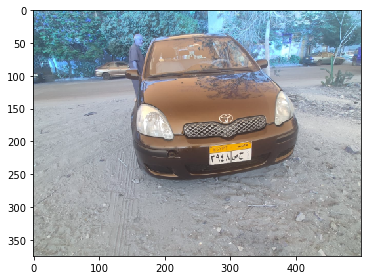

In [661]:
img_data1 =cv2.imread("dataset\data23.jpeg")
img_data1 = imutils.resize(img_data1 , width = 500)
io.imshow(img_data1)


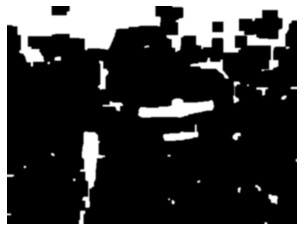

[[131 123 136 ... 214 207 209]
 [147 134 131 ... 199 190 211]
 [150 174 172 ... 164 203 214]
 ...
 [163 169 168 ... 193 166 168]
 [148 169 172 ... 159 168 178]
 [148 173 169 ... 154 162 158]]


In [662]:
def show_image (img):
    fig = plt.figure()
    plt.gray()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def image_preprocessing (img):
    '''
        in this function we are going to applying different preprocessing 
        techniques in the input image 

        prams:
                img 
    '''
    '''
   
    '''
    # initialize the rectangular and square kernels to be applied to the image,
    # then initialize the list of license plate regions
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
    squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    

    # convert the image to grayscale, and apply the blackhat operation
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

    # find regions in the image that are light
    light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKernel)
    light = cv2.threshold(light, 50, 255, cv2.THRESH_BINARY)[1]

    # compute the Scharr gradient representation of the blackhat image and s
    gradX = cv2.Sobel(blackhat,ddepth = cv2.CV_32F,dx = 1, dy = 0, ksize = -1)
    
    gradX = np.absolute(gradX)
    
    # scale theresulting image into the range [0, 255]
    (minVal, maxVal) = (np.min(gradX), np.max(gradX))
    gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype("uint8")

    # blur the gradient representation, apply a closing operating, and threshold the
    # image using Otsu's method
    gradX = cv2.GaussianBlur(gradX, (9, 9), 0)
    gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
    thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # perform a series of erosions and dilations on the image
    thresh = cv2.erode(thresh, None, iterations = 2)
    thresh = cv2.dilate(thresh, None, iterations = 3)

    # take the bitwise 'and' between the 'light' regions of the image, then perform
    # another series of erosions and dilations
    thresh = cv2.bitwise_and(thresh, thresh, mask = light)
    thresh = cv2.dilate(thresh, None, iterations =6)
    thresh = cv2.erode(thresh, None, iterations = 8)
    blur = cv2.GaussianBlur(thresh,(5,5),0)

    return blur , gray
   

w = img_data1.shape[0]
h = img_data1.shape[1]
preprocessed_img  , gray_img= image_preprocessing(img_data1)
show_image(preprocessed_img)
io.imsave('result1.jpg' , preprocessed_img)
print(gray_img)

In [663]:
def edge_img_processing(edge_img , img ):
    #Thresholding:
    #gray = cv2.cvtColor(edge_img, cv2.COLOR_BGR2GRAY)
    #T, edge_img_t = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
    edge_img_t=edge_img
    #Finding contours (only need the external contour):
    cnts, _ = cv2.findContours(edge_img_t, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #cnts=sorted(cnts, key = cv2.contourArea, reverse = false)[:50] and 

    plates = []
    for i, c in enumerate(cnts):
        x,y,w,h = cv2.boundingRect(c)
        area = w *h 
        aspect_ratio = w/h 
        plate = img[y:y+h, x:x+w]
        window =img_data1[y:y+h, x:x+w]
        avg_blue_ch = np.sum(window[:,:,2])/ (w*h)              
        avg_red_ch = np.sum(window[:,:,0])/ (w*h)  
        avg_green_ch = np.sum(window[:,:,1])/ (w*h)              

        if (1.8< aspect_ratio < 4.5 and 1000<area < 4850 and avg_red_ch >100 and avg_green_ch>110 and avg_blue_ch>80 ):
                print(i ,avg_red_ch ,avg_green_ch,avg_blue_ch)
                print (aspect_ratio , area)
                
        
                ints = 0
                sz = np.shape(plate)
                print (sz)
                for j in range (0,sz[0]):
                    for k in range (0,sz[1]):
                            ints = ints+plate[j][k]

                    #print (ints)
                smin = sz[0]*sz[1]*255*0.4
                smax = sz[0]*sz[1]*255*0.9
                plates.append(img_data1[y-1:y+h+1, x-1:x+w+1])
                #cv2.rectangle(img_data1, (x, y), (x + w, y + h), (100,0,0), 1)
            
            #print (ints,sm , plate[0])
           # if (ints > smin and ints < smax):
             

            

    #plates.sort(key=lambda by_x: by_x[1])
    #Writing the found contour into a folder
    
    print ("ssszzz")
    print (len(plates))
    for i, char in enumerate(plates):
            cv2.imwrite(f'Scannedplates/Char{i}.jpg', char )

    return  edge_img_t , img, plates

edge_img , img ,plates= edge_img_processing(preprocessed_img , gray_img)
print(np.array(plates).shape)


16 201.3341346153846 173.0798076923077 121.46105769230769
2.03125 2080
(32, 65)
ssszzz
1
(1, 34, 67, 3)
